<a href="https://colab.research.google.com/github/F1-bot/multi-label-text-classification-for-professional-orientation/blob/main/F1_bot_multi_label_text_classification_for_professional_orientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1-bot / multi-label-text-classification-for-professional-orientation

In [52]:
import keras as k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# імпорт необхідних для роботи бібліотек

In [2]:
data_frame = pd.read_csv('https://raw.githubusercontent.com/F1-bot/multi-label-text-classification-for-professional-orientation/main/PROF_INPUT2.csv')
# завантаження data set проекту

In [3]:
data_frame.head()
# попередній перегляд успішності завантаження data set проекту

,Age,ET,IT1,ST,NT,TT1,FT,JT,PT,AT,TT2,RPT,IPT,APT,SPT,PPT,CPT,PWP1,PRE,PWP2,PET1,PET2,PPET,IQ,RSA,RSB,RSC,RSD,RSE,ABG,BCM,CVW,CAD,EU,EM,EA,H,HEM,IT2,LR,LES,LST,MAPR,MI,PC,PSA,PHR,RS,SP,SC,TE,TL
0,18,1,1,1,1,1,1,1,1,1,1,14,14,14,14,14,14,12,12,12,12,12,12,140,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,18,1,1,1,1,1,1,1,1,1,1,14,14,14,14,14,14,12,12,12,12,12,12,140,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,18,1,1,1,1,1,1,1,1,1,1,14,14,14,14,14,14,12,12,12,12,12,12,140,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,18,1,1,1,1,1,1,1,1,1,1,14,14,14,14,14,14,12,12,12,12,12,12,140,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,18,1,1,1,1,1,1,1,1,1,1,14,14,14,14,14,14,12,12,12,12,12,12,140,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
input_names = ["Age", "ET", "IT1", "ST", "NT", "TT1", "FT", "JT", "PT", "AT", "TT2", "RPT", "IPT", "APT", "SPT", "PPT", "CPT",
               "PWP1", "PRE", "PWP2", "PET1", "PET2", "PPET", "IQ", "RSA", "RSB", "RSC", "RSD", "RSE"]
output_names = ["ABG", "BCM", "CVW", "CAD", "EU", "EM", "EA", "H", "HEM", "IT2", "LR", "LES", "LST", "MAPR", "MI", "PC",
                "PSA", "PHR", "RS", "SP", "SC", "TE", "TL"]
                
                # підготовка найменунь, де input_names визнає вхідні дані (про особу), а output, відповідно, вихідні (про напрями професійної діяльності)

In [5]:
raw_input_data = data_frame[input_names]
raw_output_data = data_frame[output_names]
# початковий фрейм з необробленими вхідними та вихідними даними

In [6]:
max_age = 18
max_iq = 140
max_pt = 14
max_p = 12
encoders = {"Age": lambda age: [age/max_age],
            "ET": lambda et_value: [et_value],
            "IT1": lambda it1_value: [it1_value],
            "ST": lambda st_value: [st_value],
            "NT": lambda nt_value: [nt_value],
            "TT1": lambda tt1_value: [tt1_value],
            "FT": lambda ft_value: [ft_value],
            "JT": lambda jp_value: [jp_value],
            "PT": lambda pt_value: [pt_value],
            "AT": lambda at_value: [at_value],
            "TT2": lambda tt2_value: [tt2_value],
            "RPT": lambda rpt: [rpt/max_pt],
            "IPT": lambda ipt: [ipt/max_pt],
            "APT": lambda apt: [apt/max_pt],
            "SPT": lambda spt: [spt/max_pt],
            "PPT": lambda ppt: [ppt/max_pt],
            "CPT": lambda cpt: [cpt/max_pt],
            "PWP1": lambda pwp1: [pwp1/max_p],
            "PRE": lambda pre: [pre/max_p],
            "PWP2": lambda pwp2: [pwp2/max_p],
            "PET1": lambda pet1: [pet1/max_p],
            "PET2": lambda pet2: [pet2/max_p],
            "PPET": lambda ppet: [ppet/max_p],
            "IQ": lambda iq: [iq/max_iq],
            "RSA": lambda rsa_value: [rsa_value],
            "RSB": lambda rsb_value: [rsb_value],
            "RSC": lambda rsc_value: [rsc_value],
            "RSD": lambda rsd_value: [rsd_value],
            "RSE": lambda rse_value: [rse_value],

            "ABG": lambda abg_value: [abg_value],
            "BCM": lambda bcm_value: [bcm_value],
            "CVW": lambda cvw_value: [cvw_value],
            "CAD": lambda cad_value: [cad_value],
            "EU": lambda eu_value: [eu_value],
            "EM": lambda em_value: [em_value],
            "EA": lambda ea_value: [ea_value],
            "H": lambda h_value: [h_value],
            "HEM": lambda hem_value: [hem_value],
            "IT2": lambda it2_value: [it2_value],
            "LR": lambda lr_value: [lr_value],
            "LES": lambda les_value: [les_value],
            "LST": lambda lst_value: [lst_value],
            "MAPR": lambda mapr_value: [mapr_value],
            "MI": lambda mi_value: [mi_value],
            "PC": lambda pc_value: [pc_value],
            "PSA": lambda psa_value: [psa_value],
            "PHR": lambda phr_value: [phr_value],
            "RS": lambda rs_value: [rs_value],
            "SP": lambda sp_value: [sp_value],
            "SC": lambda sc_value: [sc_value],
            "TE": lambda te_value: [te_value],
            "TL": lambda tl_value: [tl_value]}

            # словник вхідних та вихідних даних (з нормалізацією)

In [7]:
def dataframe_to_dict(df):
    result = dict()
    for column in df.columns:
        values = data_frame[column].values
        result[column] = values
    return result
    
    # датафрейм для csv

In [8]:
def make_supervised(df):
    raw_input_data = data_frame[input_names]
    raw_output_data = data_frame[output_names]
    return {"inputs": dataframe_to_dict(raw_input_data),
            "outputs": dataframe_to_dict(raw_output_data)}

    # розподіл вхідних та вихідних даних

In [9]:
def encode(data):
    vectors = []
    for data_name, data_values in data.items():
        encoded = list(map(encoders[data_name], data_values))
        vectors.append(encoded)
    formatted = []
    for vector_raw in list(zip(*vectors)):
        vector = []
        for element in vector_raw:
            for e in element:
                vector.append(e)
        formatted.append(vector)
    return formatted

    # функція для кодування у вектори

In [10]:
supervised = make_supervised(data_frame)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))

# прийом датафрейму з вхідними та вихідними даними

In [11]:
train_x = encoded_inputs[:600]
train_y = encoded_outputs[:600]

test_x = encoded_inputs[875:] 
test_y = encoded_outputs[875:] 

# розподіл вибірки

In [12]:
INPUT_DIM = 29
OUTPUT_DIM = 23

# кількість вхідних та вихідних елементів

In [37]:
model = k.models.Sequential()
model.add(k.layers.Dense(8, activation='relu',  input_dim = INPUT_DIM ))
model.add(k.layers.Dense(8, activation='relu'))
model.add(k.layers.Dense(OUTPUT_DIM, activation='softmax')) # or tanh

# опис моделі для класифікації та прогназування

In [39]:
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])

# компіляція моделі

In [40]:
fit_results = model.fit(train_x, train_y, epochs=100, validation_split=0.2)

# тренування моделі за розподіленою вибіркою

Epoch 1/100
15/15 [==============================] - 1s 16ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.9150 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.9150 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.9150 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.9150 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.9150 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - val_loss: 0.9150 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.9150 - accuracy: 0.0000e+00 - 

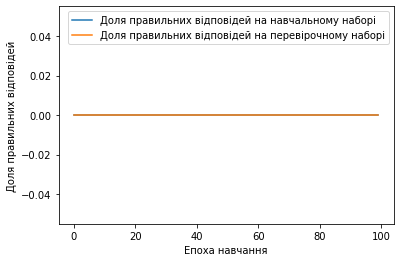

In [41]:
plt.plot(fit_results.history['accuracy'], 
         label='Доля правильних відповідей на навчальному наборі')
plt.plot(fit_results.history['val_accuracy'], 
         label='Доля правильних відповідей на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Доля правильних відповідей')
plt.legend()
plt.show()

# Візуалізація правильних відповідей при навчанні та перевірці

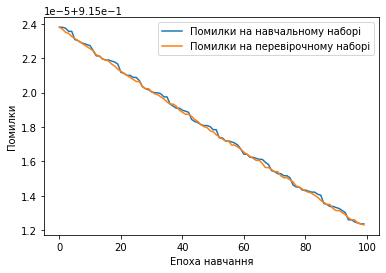

In [42]:
plt.plot(fit_results.history['loss'], 
         label='Помилки на навчальному наборі')
plt.plot(fit_results.history['val_loss'], 
         label='Помилки на перевірочному наборі')
plt.xlabel('Епоха навчання')
plt.ylabel('Помилки')
plt.legend()
plt.show()

# Візуалізація помилок при навчанні та перевірці

In [43]:
predicted_test = model.predict(test_x)
print(predicted_test[0])

# загальні тенденції за всіма елементами виводу

[0.04032128 0.0379132  0.05646728 0.05348928 0.0581288  0.03383755
 0.02947139 0.04762405 0.04804357 0.04865341 0.05389041 0.04943615
 0.04896256 0.04961952 0.04313707 0.03614517 0.02863172 0.03446969
 0.05277371 0.03248866 0.04530168 0.03221957 0.03897426]


In [44]:
real_data = data_frame.iloc[875:][output_names]
real_data.reset_index(inplace=True)
real_data["ABG"] = predicted_test[:,0]
real_data["BCM"] = predicted_test[:,1]
real_data["CVW"] = predicted_test[:,2]
real_data["CAD"] = predicted_test[:,3]
real_data["EU"] = predicted_test[:,4]
real_data["EM"] = predicted_test[:,5]
real_data["EA"] = predicted_test[:,6]
real_data["H"] = predicted_test[:,7]
real_data["HEM"] = predicted_test[:,8]
real_data["IT2"] = predicted_test[:,9]
real_data["LR"] = predicted_test[:,10]
real_data["LES"] = predicted_test[:,11]
real_data["LST"] = predicted_test[:,12]
real_data["MAPR"] = predicted_test[:,13]
real_data["MI"] = predicted_test[:,14]
real_data["PC"] = predicted_test[:,15]
real_data["PSA"] = predicted_test[:,16]
real_data["PHR"] = predicted_test[:,17]
real_data["RS"] = predicted_test[:,18]
real_data["SP"] = predicted_test[:,19]
real_data["SC"] = predicted_test[:,20]
real_data["TE"] = predicted_test[:,21]
real_data["TL"] = predicted_test[:,22]
print(real_data)

# виведення інформації відповідності, відповідно до вихідних елементів

    index       ABG       BCM       CVW  ...        SP        SC       TE        TL
0     875  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
1     876  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
2     877  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
3     878  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
4     879  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
5     880  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
6     881  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
7     882  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
8     883  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
9     884  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0.038974
10    885  0.040321  0.037913  0.056467  ...  0.032489  0.045302  0.03222  0

In [45]:
pd.DataFrame(real_data)

# табличний вигляд опрацьованих вихідних даних

,index,ABG,BCM,CVW,CAD,EU,EM,EA,H,HEM,IT2,LR,LES,LST,MAPR,MI,PC,PSA,PHR,RS,SP,SC,TE,TL
0,875,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
1,876,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
2,877,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
3,878,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
4,879,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
5,880,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
6,881,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
7,882,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
8,883,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974
9,884,0.040321,0.037913,0.056467,0.053489,0.058129,0.033838,0.029471,0.047624,0.048044,0.048653,0.05389,0.049436,0.048963,0.04962,0.043137,0.036145,0.028632,0.03447,0.052774,0.032489,0.045302,0.03222,0.038974


In [53]:
model.save("gg_model.h5")
real_data.to_csv("PROF_OUTPUT.csv")
# збереження моделі

In [54]:
files.download("gg_model.h5")
files.download("PROF_OUTPUT.csv")
# завантаження моделі та .csv файлу з прогнозуванням успіху  при обрані професійного напряму

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>